In [120]:
import numpy as np 
import pandas as pd

In [122]:
import scanpy as sc
from hyper import *
from alignment import *
from datasets.preprecossing import *
from core import *
from datasets.loading import *
from datasets.hc_dataset import *
from datasets.balance_dataset import *
from utils.linkage import *
from model.balancehc import balancehc

from utils.poincare import *
import scib
import shutil



In [94]:
adata = sc.read_h5ad('./datas/23/2/BRCA_GSE110686.h5ad')
adata

AnnData object with n_obs × n_vars = 6035 × 12750
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage'
    var: 'features'

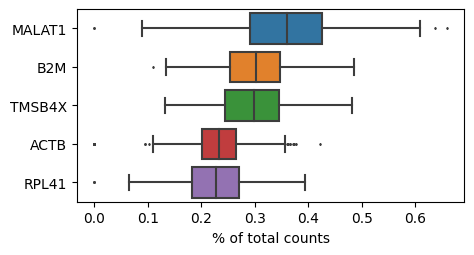

In [111]:
sc.pl.highest_expr_genes(adata, n_top=5)


In [114]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
adata

         Falling back to preprocessing with `sc.pp.pca` and default params.


2024-04-04 18:10:01.425438: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
python(30870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


AnnData object with n_obs × n_vars = 6035 × 12750
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

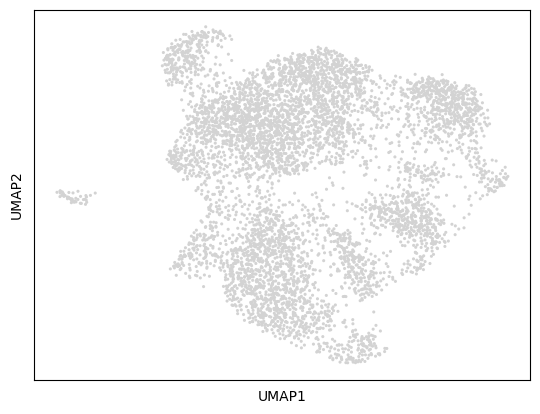

In [115]:
sc.pl.umap(adata)

In [158]:
sc.tl.leiden(adata,resolution=0.5)

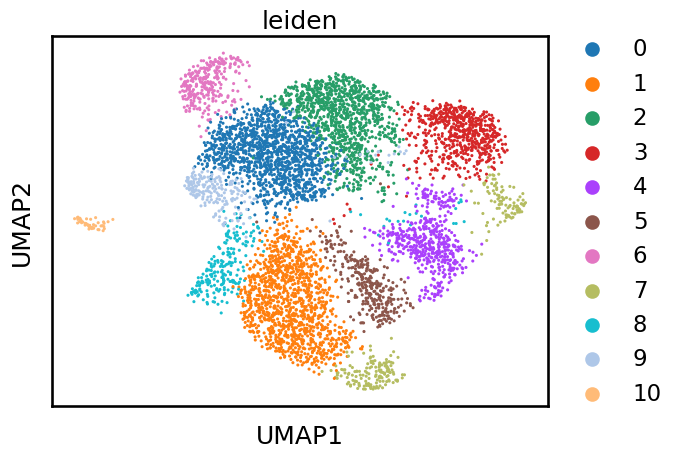

In [159]:
sc.pl.umap(adata,color='leiden')

In [90]:
import plotly.graph_objects as go

data1 = [0.7970374983963846,0.8650970359421197,0.8310301146676967,0.925147975679354]
data2 = [0.7731919492859319,0.836053584627616,0.7379233941600186,0.802004475272921]
data3 = [0.557962972056578,0.8027990046717481,0.5907096456288126,0.6891063485795421,0.6956110143698048,0.6650878700432603,0.6488878248730249]
data4 = [0.5986280640660694,0.7893123060623767,0.5838091853739246,0.7653869079901405,0.7557440539537852,0.7438780066411699,0.8068504671806307]
data5 = [0.7014703690574254,0.5783142758026139,0.5524959233866975,0.6113987002048284]
data6 = [0.7868447456085952,0.8479833790439009,0.7185499556627288,0.7924564886350908]
fig = go.Figure()
fig.add_trace(go.Box(y=data1, quartilemethod="inclusive",boxpoints=False ,name="FYP"))
fig.add_trace(go.Box(y=data2, quartilemethod="inclusive",boxpoints=False, name="Capital"))
fig.add_trace(go.Box(y=data3, quartilemethod="inclusive",boxpoints=False, name="scAlign"))
fig.add_trace(go.Box(y=data4, quartilemethod="inclusive",boxpoints=False, name="scMerge"))
fig.add_trace(go.Box(y=data5, quartilemethod="inclusive",boxpoints=False, name="Scanorama"))
fig.add_trace(go.Box(y=data6, quartilemethod="inclusive",boxpoints=False, name="scVI"))

# fig.update_traces(boxpoints='no', jitter=0)
fig.show()

In [10]:
fig.write_image("./fig1.pdf")


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
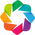

   source  target  value
0       1       0      1
1       2       0      8
2       3       0     10


In [8]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

hv.extension('bokeh')
hv.output(size=200)
links = pd.DataFrame(data['links'])
print(links.head(3))

In [26]:
links

,source,target,value
0,1,0,1
1,2,0,8
2,3,0,10
3,3,2,6
4,4,0,1
...,...,...,...
249,76,66,1
250,76,63,1
251,76,62,1
252,76,48,1


In [9]:
hv.Chord(links)


:Chord   [source,target]   (value)

In [10]:
nodes = hv.Dataset(pd.DataFrame(data['nodes']), 'index')
nodes.data.head()

,index,name,group
0,0,Myriel,1
1,1,Napoleon,1
2,2,Mlle.Baptistine,1
3,3,Mme.Magloire,1
4,4,CountessdeLo,1


In [33]:
l =[('16', '18'), ('15', '16'), ('14', '14'), ('13', '13'), ('9', '12'), ('7_CD8Tex', '6_CD8Tex'), ('6_CD8T', '2_CD8T'), ('2_CD8T', '1_CD8T'), ('0_CD8T', '0_CD8T'), ('1_CD8T', '3_CD8T'), ('12', '15'), ('11', '11'), ('10', '10'), ('5_CD4Tconv', '8_CD4Tconv'), ('3_CD4Tconv', '7_CD4Tconv'), ('8_CD4Tconv', '4_CD4Tconv'), ('4_CD8T', '5_CD8T')]
len(l)

17

In [160]:
df

,source,target,weight
0,1_16,2_18,0.298740
1,1_15,2_16,0.887428
2,1_14,2_14,0.439411
3,1_13,2_13,0.703471
4,1_9,2_12,0.536212
5,1_7_CD8Tex,2_6_CD8Tex,0.969820
6,1_6_CD8T,2_2_CD8T,0.520277
7,1_2_CD8T,2_1_CD8T,0.031319
8,1_0_CD8T,2_0_CD8T,0.570413
9,1_1_CD8T,2_3_CD8T,0.150429


In [67]:
# Load d3blocks
from d3blocks import D3Blocks
#
# Initialize
d3 = D3Blocks(chart='Chord', frame=False)
# Load example data
df = d3.import_example('energy')
df = df[:17]
for i in range(len(l)):
    df['source'][i] = '1_'+l[i][0]
    df['target'][i] = '2_'+l[i][1]


df['weight'] = [np.random.random() for i in range(len(df))]
d3.set_node_properties(df)
d3.set_edge_properties(df)
for i in range(len(df)):
    d3.node_properties.get(df.iloc[i][0])['color']='#949398FF'
    d3.node_properties.get(df.iloc[i][1])['color']='#F4DF4EFF'
d3.show()


[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/d3blocks/chord.html]
[d3blocks] >INFO> Import dataset [energy]
/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_21502/3257247897.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source'][i] = '1_'+l[i][0]
/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_21502/3257247897.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][i] = '2_'+l[i][1]
[d3blocks] >INFO> Node properties are set.
[d3bloc

In [53]:
df

,source,target,weight
0,1_16,2_18,0.634910
1,1_15,2_16,0.901490
2,1_14,2_14,0.754650
3,1_13,2_13,0.260123
4,1_9,2_12,0.270707
5,1_7_CD8Tex,2_6_CD8Tex,0.613376
6,1_6_CD8T,2_2_CD8T,0.932742
7,1_2_CD8T,2_1_CD8T,0.945628
8,1_0_CD8T,2_0_CD8T,0.959023
9,1_1_CD8T,2_3_CD8T,0.334108


0


AttributeError: 'D3Blocks' object has no attribute 'node_properties'

In [58]:
df.iloc[0][0]

'1_16'

In [124]:
meta_list1 = ['CD4Tn', 'Tfh', 'Tfh', 'Tfh', 'Th2']
meta_list2 = ['CD4Tn', 'Th17', 'Tfh', 'Tfh', 'Tfh']

In [157]:
nodes1 = build_hyper_tree_from_folder('./datas/i/1/',True)
nodes2 = build_hyper_tree_from_folder('./datas/i/2/',True)
nodes_merge1 = [];
nodes_merge2 = [];
add_meta(nodes1[0],meta_list1,[])
add_meta(nodes2[0],meta_list2,[])
T=tree_alignment(nodes1[0],nodes2[0],1);
minn = T.run_alignment();
T.show_ans();
ans = T.get_ans()
t=show_graph(ans,nodes1[0],nodes2[0],color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']);
t.show_fig()

The mininum cost for alignment is 3.272727272727273
The alignment edges list is [('8', '8'), ('7', '1_Th17'), ('1_Tfh', '2_Tfh'), ('2_Tfh', '3_Tfh'), ('4_Th2', '7'), ('3_Tfh', '4_Tfh')]
{'empty': '#fff', 'Th17': '#1a759f', 'Tfh': '#168aad', 'Th2': '#34a0a4', 'CD4Tn': '#52b69a'}


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/alignment.py:799: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/alignment.py:799: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for a

In [156]:
class show_graph:
    def __init__(self,ans,root1,root2,color=None):
        self.ans = ans;
        
        self.pos_x=[];
        self.pos_y=[];
        self.edges=[];
        self.label_hash = dict(); 
        self.labels = [];
        self.hover_text =[];
        self.values=[];
        self.cnt = 0;
        self.celltypes1=[]
        self.celltypes2=[]

        self.color = color;
        self.pos_x_2=[];
        self.pos_y_2=[];
        self.edges_2=[];
        self.label_hash_2 = dict(); 
        self.labels_2 = []
        self.hover_text_2 = []
        self.values_2=[];
        self.cnt2 = 0;
        self.fig = go.Figure();
        
        self.root1 = root1;
        self.root2 = root2;
        self.height = 5;
        self.run_graph();
        
    def cal_tree_pos(self,now,l,r,h,f,pos_x,pos_y,edges,label_hash,labels,hover_text,values,celltype):
        mid = (l+r)/2
        pos_x.append(mid);
        pos_y.append(h)
        label_hash[now.name]=self.cnt;
        num_son = len(now.son);
        labels.append("{}".format(now.name));
        if(len(now.name.split('_')) >1):
            celltype.append(now.name.split('_')[1])
        else:
            celltype.append('empty');
        
        edges.append((f.name,now.name));
        hover_text.append("connect Empty");
        values.append(np.linalg.norm(now.value));
        if(num_son == 0):
            return;
        length = (r-l)/num_son;
        for i in range(num_son):
            self.cnt+=1;
            self.cal_tree_pos(now.son[i],l+i*length,l+(i+1)*length,h-1.5,now,pos_x,pos_y,edges,label_hash,labels,hover_text,values,celltype);
            
    def cal_tree_pos2(self,now,l,r,h,f,pos_x,pos_y,edges,label_hash,labels,hover_text,values,celltype):
        mid = (l+r)/2
        pos_x.append(mid);
        pos_y.append(h)
        label_hash[now.name]=self.cnt2;
        num_son = len(now.son);
        labels.append("{}".format(now.name));
        if(len(now.name.split('_')) >1):
            celltype.append(now.name.split('_')[1])
        else:
            celltype.append('empty');
        edges.append((f.name,now.name));
        hover_text.append("connect Empty");
        values.append(np.linalg.norm(now.value))
        if(num_son == 0):
            return;

        length = (r-l)/num_son;
        for i in range(num_son):
            self.cnt2+=1;
            self.cal_tree_pos2(now.son[i],l+i*length,l+(i+1)*length,h-1.5,now,pos_x,pos_y,edges,label_hash,labels,hover_text,values,celltype);
            
    def run_graph(self):
        
        self.cal_tree_pos(self.root1,1,20,self.height,self.root1, self.pos_x,self.pos_y,self.edges,self.label_hash,self.labels,self.hover_text,self.values,self.celltypes1);
        
        self.cal_tree_pos2(self.root2,18,37,self.height-1.5,self.root2, self.pos_x_2,self.pos_y_2,self.edges_2,self.label_hash_2,self.labels_2,self.hover_text_2,self.values_2,self.celltypes2);
        unique_categories = list(set(self.celltypes1+self.celltypes2))
        if(self.color == None):
            category_colors = {cat: f'#{random.randint(0, 0xFFFFFF):06x}' for cat in unique_categories}
        elif(len(self.color)>= len(unique_categories)):
            category_colors = {cat: col  for cat,col in zip(unique_categories,self.color[:len(unique_categories)])}
        else:
            category_colors = {cat: f'#{random.randint(0, 0xFFFFFF):06x}' for cat in unique_categories}
            
        category_colors['empty'] = '#fff'        
        print(category_colors)
        
        for i in self.edges:
            p1,p2 = i;
            index1=self.label_hash[p1];
            index2=self.label_hash[p2];

            x1=self.pos_x[index1];y1=self.pos_y[index1];
            x2=self.pos_x[index2];y2=self.pos_y[index2];
            self.fig.add_shape(
                type="line",
                x0=x1, y0=y1, x1=x2, y1=y2,
                line=dict(
                    color="#333",
                    width=4,
                ),
                layer="below"
            )

        for i in self.edges_2:
            p1,p2 = i;

            index1=self.label_hash_2[p1];
            index2=self.label_hash_2[p2];

            x1=self.pos_x_2[index1];y1=self.pos_y_2[index1];
            x2=self.pos_x_2[index2];y2=self.pos_y_2[index2];
            self.fig.add_shape(
                type="line",
                x0=x1, y0=y1, x1=x2, y1=y2,
                line=dict(
                    color="#333",
                    width=4,
                ),
                layer="below"
            )
            
        for i in self.ans:
            p1,p2 = i;
            index1=self.label_hash[p1];
            index2=self.label_hash_2[p2];
            x1=self.pos_x[index1];y1=self.pos_y[index1];
            x2=self.pos_x_2[index2];y2=self.pos_y_2[index2];
            self.fig.add_shape(
                type="line",
                x0=x1, y0=y1, x1=x2, y1=y2,
                line=dict(
                    color="#6175c1",
                    width=4,
                ),
                layer="below"
            )
            self.hover_text[index1]="connect {}".format(p2);
            self.hover_text_2[index2]="connect {}".format(p1);
          
        for cell_type in unique_categories:
            indexs = [i for i in range(len(self.celltypes1)) if self.celltypes1[i] == cell_type]
            x_cell1 = [self.pos_x[i] for i in indexs]
            y_cell1 = [self.pos_y[i] for i in indexs]
            label1 = [self.hover_text[i] for i in indexs]
            name1 = [self.labels[i] for i in indexs]
            indexs = [i for i in range(len(self.celltypes2)) if self.celltypes2[i] == cell_type]
            x_cell2 = [self.pos_x_2[i] for i in indexs]
            y_cell2 = [self.pos_y_2[i] for i in indexs]
            label2 = [self.hover_text_2[i] for i in indexs]
            name2 = [self.labels_2[i] for i in indexs]
            x_cell = x_cell1+x_cell2
            y_cell = y_cell1 + y_cell2
            label = label1+label2
            # Add scatter trace for the current cell type
            self.fig.add_trace(go.Scatter(
                x=x_cell,
                y=y_cell,
                mode='markers+text',
                name=cell_type,
                legendgroup=cell_type,
                marker=dict(
                    symbol='circle-dot',
                    size=35,
                    color=category_colors[cell_type]  # Set color based on cell type
                ),
                hoverinfo='text',
                hovertext=label,
                text = name1+name2,
                textfont=dict(family='sans serif',
                size=15,
                color='#000000'
                    ),
            ))
        # pos_x_final = self.pos_x+self.pos_x_2
        # pos_y_final = self.pos_y+self.pos_y_2
        # values_final = self.values + self.values_2
        # labels_final = self.labels + self.labels_2
        # self.fig.add_trace(go.Scatter(x=pos_x_final,
        #                 y=pos_y_final,
        #                 mode='markers+text',
        #                 marker=dict(symbol='circle-dot',
        #                                 size=50,
        #                                 color=values_final,
        #                                 colorscale="peach",
        #                                 ),
        #                 text=labels_final,
        #                 hoverinfo='text',
        #                 hovertext=self.hover_text+self.hover_text_2,
        #                 textfont=dict(family='sans serif',
        #                 size=18,
        #                 color='#000000'
        #                     ),
        #                 opacity=0.8,
        #                 ))
        
        self.fig.update_layout(  
            xaxis= dict(showline=False, # hide axis line, grid, ticklabels and  title
                    zeroline=False,
                    showgrid=False,
                    showticklabels=False,
                    ),
            yaxis=dict(showline=False, # hide axis line, grid, ticklabels and  title
                    zeroline=False,
                    showgrid=False,
                    showticklabels=False,
                    ),
        width=1000, height=500)
        
        # self.fig.show()
    def show_fig(self):
        self.fig.show();
    def save_fig(self,path):
        self.fig.write_image(path)


In [127]:
class show_tree:
    def __init__(self,root1,color=None):
        self.pos_x=[];
        self.pos_y=[];
        self.edges=[];
        self.label_hash = dict(); 
        self.labels = [];
        self.hover_text =[];
        self.values=[];
        self.cnt = 0;
        self.height=5;
        self.celltypes = [];
        self.fig = go.Figure();
        self.color = color;
        self.root1 = root1;
        self.run_graph();
        
    def cal_tree_pos(self,now,l,r,h,f,pos_x,pos_y,edges,label_hash,labels,hover_text,values,celltypes):
        mid = (l+r)/2
        pos_x.append(mid);
        pos_y.append(h)
        label_hash[now.name]=self.cnt;
        num_son = len(now.son);
        labels.append("{}".format(now.name));
        if(len(now.name.split('_')) >1):
            celltypes.append(now.name.split('_')[1])
        else:
            celltypes.append('empty');
        edges.append((f.name,now.name));
        hover_text.append("connect Empty");
        values.append(np.linalg.norm(now.value));
        if(num_son == 0):
            return;
        length = (r-l)/num_son;
        for i in range(num_son):
            self.cnt+=1;
            self.cal_tree_pos(now.son[i],l+i*length,l+(i+1)*length,h-1.5,now,pos_x,pos_y,edges,label_hash,labels,hover_text,values,celltypes);
            

    def run_graph(self):
        
        self.cal_tree_pos(self.root1,1,10,self.height,self.root1, self.pos_x,self.pos_y,self.edges,self.label_hash,self.labels,self.hover_text,self.values,self.celltypes);
        
        unique_categories = list(set(self.celltypes))
        if(self.color == None):
            category_colors = {cat: f'#{random.randint(0, 0xFFFFFF):06x}' for cat in unique_categories}
        elif(len(self.color)>= len(unique_categories)):
            category_colors = {cat: col  for cat,col in zip(unique_categories,self.color[:len(unique_categories)])}
        else:
            category_colors = {cat: f'#{random.randint(0, 0xFFFFFF):06x}' for cat in unique_categories}
            
        category_colors['empty'] = '#fff'
        print(category_colors)
        for i in self.edges:
            p1,p2 = i;
            index1=self.label_hash[p1];
            index2=self.label_hash[p2];

            x1=self.pos_x[index1];y1=self.pos_y[index1];
            x2=self.pos_x[index2];y2=self.pos_y[index2];
            self.fig.add_shape(
                type="line",
                x0=x1, y0=y1, x1=x2, y1=y2,
                line=dict(
                    color="#333",
                    width=2,
                ),
                layer="below"
            )
        # Iterate over unique cell types
        for cell_type in unique_categories:
            indexs = [i for i in range(len(self.celltypes)) if self.celltypes[i] == cell_type]
            x_cell = [self.pos_x[i] for i in indexs]
            y_cell = [self.pos_y[i] for i in indexs]
            
            # Add scatter trace for the current cell type
            self.fig.add_trace(go.Scatter(
                x=x_cell,
                y=y_cell,
                mode='markers+text',
                name=cell_type,
                legendgroup=cell_type,
                marker=dict(
                    symbol='circle-dot',
                    size=10,
                    color=category_colors[cell_type]  # Set color based on cell type
                ),
                # text=[self.labels[i] for i in indexs],
                hoverinfo='text',
                hovertext=[self.labels[i] for i in indexs],
                # #textposition="top center",
                # textfont=dict(family='sans serif',
                # size=18,
                # color='#000000'
                # ),
                # opacity=0.8,
            ))

        self.fig.update_layout(  
            xaxis= dict(showline=False, # hide axis line, grid, ticklabels and  title
                    zeroline=False,
                    showgrid=False,
                    showticklabels=False,
                    ),
            yaxis=dict(showline=False, # hide axis line, grid, ticklabels and  title
                    zeroline=False,
                    showgrid=False,
                    showticklabels=False,
                    ),
        width=1000, height=500
        )
        
        # self.fig.show()
    def show_fig(self):
        self.fig.show();
      

In [130]:
a=[]
b=[1]
a+b

[1]